 # Analize mini lige

V tej datoteki je narejena analiza minilige. Trenutno je analizirana miniliga 746814. Če želite analizirati katero drugo miniligo prvo prenesite potrebne podatke (glej read.me). Če ste podatke že prenesli le zamenjajte league_id z idjem lige, ki si jo želite analizirati in ponovno zaženite celo datoteko.  

Da bi bila datoteka lahko uporabljena za katerokoli miniligo so prvo predstavljeni podatki o dani ligi in nato narejena le preprosta analiza nekaterih povprečnih vrednosti v ligi, ki pa jo lahko dopolnite po svojih željah. 


In [1]:
#IMPORT
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import Dictionaries

league_id = 746814 # Vstavi željeni league_id prvo prenesi potrebne podatke !

gws, chips = Dictionaries.collect(league_id)



Problem with 7069926 - Miljo's 11


V zelo velilki večini primerov se prenesejo vse ekipe iz dane minilige, v določenih primerih pa je z 
nekaterimi ekipami lahko problem (sklepam, da so to ekipe, ki so bile dodane v miniligo naknadno), če se tak problem pojavi se bo dana ekipa, za katero ni bilo podatkov izpisala nad tem odstavkom.

## Vrstni red v ligi

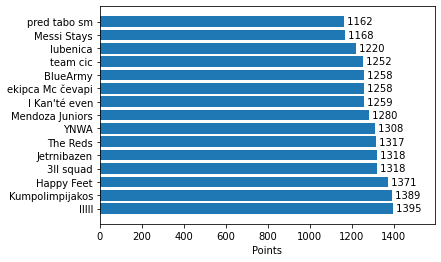

In [2]:
# ekipe = skupni_df.groupby('team_name').max().sort_values('total_points', ascending = False)
# ekipe.plot(y = 'total_points', kind='bar', legend=None) #.bar(1800, 1, width = 1, align = 'center')

skupni_df = pd.concat(list(gws.values()))

imena = skupni_df['team_name']
imena = list(dict.fromkeys(imena)) #znebim ponovitev

naj = skupni_df.groupby('team_name').max().sort_values('total_points', ascending = False)['total_points']

plt.barh(imena,naj)
plt.xlabel('Points')
plt.ylabel(None)
#plt.title()

for i, v in enumerate(naj):
    plt.text(v, i, " "+str(v),  va='center')

plt.axis([0, max(naj) + 200,None,None])

plt.show()

## Uporabljeni čipi
Spodnja tabela prikazuje porabljene chipe posameznih managerjev.  
( **OPOMBA** : Te podatki sami posebi niso zanimivi za analizo, vendar jih je zelo ne praktično poiskati za vse igralce minlige.)

In [3]:
chips_df = pd.concat(list(chips.values()))
chips_df.sort_values('id')

,Unnamed: 0,name,time,event,id,team_name
1,1,wildcard,2021-01-02T23:19:59.940919Z,18,1025697,The Reds
0,0,wildcard,2020-09-29T21:52:20.279058Z,4,1025697,The Reds
0,0,wildcard,2020-10-28T23:05:17.048881Z,7,1093759,IIIII
1,1,freehit,2021-01-11T17:29:15.058688Z,18,1093759,IIIII
2,2,wildcard,2021-01-30T10:51:44.409877Z,21,1093759,IIIII
1,1,freehit,2020-12-28T11:22:31.211600Z,16,1457623,ekipca Mc čevapi
0,0,wildcard,2020-09-24T07:34:50.629403Z,3,1457623,ekipca Mc čevapi
0,0,freehit,2021-01-05T07:08:38.823028Z,18,1841136,Messi Stays
1,1,wildcard,2021-01-15T09:34:50.850055Z,19,1841136,Messi Stays
0,0,wildcard,2020-11-20T06:58:26.462213Z,9,3327253,BlueArmy


## Povprečje lige

### Povprečni rank
Kakšna je povprečna kvaliteta lige glede na vse ostale igralce FPLa.  

Vseh ekip je nekoliko manj kot 6 000 000.  

(-0.10000000000000009, 24.1, 0.0, 6000000.0)

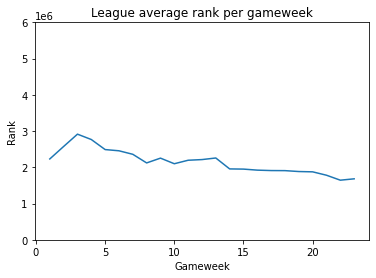

In [4]:

povprecje = skupni_df.groupby('event').mean()

plt.plot(povprecje['overall_rank'])
plt.xlabel('Gameweek')
plt.ylabel('Rank')
plt.title('League average rank per gameweek')
plt.axis([None, None,0, 6000000,])

# plt.ylim(0,3,0.5)
# plt.xticks(np.arange(0,24,2))

### Povprečje točk na GW
Predstavljen je graf točk na gw, trenutno treh najboljših ekip v ligi.

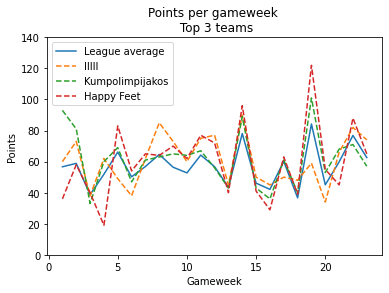

In [5]:
#fig, ax = plt.subplots()
prvi_tri = list(gws.values())[0:3]

plt.plot(povprecje['points'], label = 'League average')
for team in prvi_tri:
    plt.plot(team['event'], team['points'], label = team.team_name[0], linestyle = '--')


plt.xlabel('Gameweek')
plt.ylabel('Points')
plt.title('Points per gameweek \n Top 3 teams')
plt.axis([None, None,0, 140,])
plt.legend()

Če te zanima še kako se je odrezala katera druga ekipa, lahko to storiš spodaj. V zadnji vrstici ki se začne z # 
nadomestiš <*Ime_ekipe*> z imenom ekipe, ki te zanima in pobrišeš prvi # in še enkrat poženeš kodo.

In [6]:
def dodatna_ekipa(ime):
    id_ = chips_df[chips_df.team_name == ime]['id'][0] # rabimo iz imena dobit id
    team = gws.get(id_) 
    plt.plot(team['event'], team['points'], label = team.team_name[0], linestyle = '--')
    plt.plot(povprecje['points'], label = 'League average')
    plt.xlabel('Gameweek')
    plt.ylabel('Points')
    plt.axis([None, None,0, 140,])
    plt.legend()
    pass



 # dodatna_ekipa(<Ime_ekipe>) # <------------------------------- TUKAJ!


## Ostali povprečni podatki

Za konec so predstavljeni še nekateri dodatni povprečni podatki v ligi.

In [7]:
skupni_df.groupby('team_name').mean()[['event_transfers_cost', 'points', 'value', 'points_on_bench', 'bank']].sort_values('points', ascending = False)

,event_transfers_cost,points,value,points_on_bench,bank
team_name,,,,,
Kumpolimpijakos,1.391304,61.782609,1022.173913,5.739130,21.782609
IIIII,0.000000,60.652174,1016.043478,3.695652,5.347826
Happy Feet,0.521739,60.130435,1017.652174,2.478261,10.826087
Jetrnibazen,2.434783,59.739130,1016.913043,6.739130,12.000000
The Reds,1.565217,58.826087,1015.739130,2.521739,19.173913
YNWA,1.217391,58.086957,1032.043478,5.130435,8.608696
Mendoza Juniors,2.260870,57.913043,1024.086957,3.304348,10.913043
3ll squad,0.000000,57.304348,1013.478261,8.956522,2.260870
BlueArmy,1.739130,56.434783,1013.043478,3.391304,11.869565


## 

Ker je dana analiza mišljena za poljubno ligo ni predstavljenih nobenih globjih ugotovitev. Z veseljem pa lahko dopišeš še kašno kodo, le za svojo ligo.